In [22]:
%pylab inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import*
init_printing(use_unicode=True)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [23]:
#Defino la función que me recibe como parámetro 
#Defino los símbolos para poder resolver el polinomio
#De creación empírica uso el polinomio de Adam-Basforth (Con inspiración de un HandsON realizado en clase) 
#Defino las variables T1 y T2 con la herramienta var

init_printing(use_unicode=True)

def Lagrange(Num):
    fu=0
    #f=var('f')
    t=var('t')
    for i in range(Num):
        nn=1
        for j in range(Num):
            if i != j:
                t1 = var('t%d'%j)
                t2 = var('t%d'%i)
                nn *= ((t - t1)/(t2 - t1))
        fu+=nn*var('f%d'%i)
    return fu

In [24]:
#Función de orden cero (0)
Lagrange(0)

In [26]:

#Función de orden primero (1)
Lagrange(1)

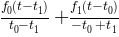

In [27]:
#Función de orden dos (2)
Lagrange(2)

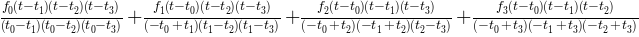

In [28]:
#Función de orden cuatro (4)
Lagrange(4)

#b)Adams

In [31]:
#Defino la función de adams
#Defino las variables con la ayuda de SYmbols y un arreglo de SYmbols para ir generando el for 
#Traigo mi función Lagrange como mi polinomio
#Con la ayuda de subs voy reescribiendo el polinomio

init_printing(use_unicode=True)


def Adams(Num):
    
    Polinomio=Lagrange(Num)
    t=symbols('t')
    arraySim=symarray('t', Num) 
    h=symbols('h') 
    
    for i in range(Num):
        
        Polinomio = Polinomio.subs(arraySim[i],arraySim[0]-i*h)
        integral=simplify(integrate(Polinomio,(t,arraySim[0],(arraySim[0]+h))))
        
    return integral

In [32]:
#Función de orden uno (1)
Adams(1)

#Punto 2
##Potencial Gravitacional

In [14]:
#Definimos todas las constantes necesarias
#Densidad las unidad son (Kg/cm3)
#La unidad del lado del cubo esta en (m)
#Todas las unidades de as constantes se encuentran en SI (Sistema Internacional)

M=30 #Masa en kg
Ro=400.

Lado=270

e0=8.85e-12 

q=1e-2 

Nl=100

xmin=-Lado/2

xmax= Lado/2

ymin=-Lado/2

ymax= Lado/2

zmin=-Lado/2

zmax=Lado/2

NumIter=10

G=6.674e-11

In [ ]:
#Declaro las coordenadas en las tres dimesiones
#Creo los mesgrid de cada coordenada (x y z)
#La variable que se llama constante pertenece al potencial gravitacional
#Creo el cuadrado con la ayuda de np.ones y np.zeros
#Mi cubo es de 10x10x10 y esta fijado en el centro de la malla de 100x100x100

xx=np.linspace(xmin,xmax,Nl)
yy=np.linspace(ymin,ymax,Nl) 
zz=np.linspace(zmin,zmax, Nl)

x,y,z=np.meshgrid(xx,yy,zz)

dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl
dz=(zmax-zmin)/Nl

constante=Ro*np.pi*4*G

densidad=np.zeros((Nl,Nl,Nl))

cuadrado = np.ones((10,10,10))
cuadradoEn400= cuadrado*constante
cuafradoF=np.array(cuadradoEn400*4.*pi*G*M**2)

densidad[45:55,45:55,45:55] = cuadradoEn400


densidadf=np.array(densidad*4.*pi*G*M**2)
print len(densidadf)
print len(cuadrado)
print densidadf[44:50,44:50,44:50]

In [21]:
#Se implementa el método de relación, inspirado en el cuaderno de Juan David Lizarazo
X=x*x
Y=y*y
Z=z*z
r=np.sqrt(X+Y+Z)
#Se define el potencial
Pot=-G*Ro*M**3/r
print Pot
for __ in range(NumIter):
    Pot=1/6.*(np.roll(Pot,1,axis=0)+
              np.roll(Pot,-1,axis=0)+
              np.roll(Pot,1,axis=1)+
              np.roll(Pot,-1,axis=1)+
              np.roll(Pot,1,axis= 2)+
              np.roll(Pot,-1,axis= 2)-
              densidadf)
    Pot[0]=0.
    Pot[-1]=0.
    Pot[:,0]=0.
    Pot[:,-1]=0.
    Pot[:,:,0]=0.
    Pot[:,:,-1]=0.

[[[ -3.08258856e-06  -3.10334482e-06  -3.12408948e-06 ...,  -3.12408948e-06
    -3.10334482e-06  -3.08258856e-06]
  [ -3.10334482e-06  -3.12452610e-06  -3.14570134e-06 ...,  -3.14570134e-06
    -3.12452610e-06  -3.10334482e-06]
  [ -3.12408948e-06  -3.14570134e-06  -3.16731303e-06 ...,  -3.16731303e-06
    -3.14570134e-06  -3.12408948e-06]
  ..., 
  [ -3.12408948e-06  -3.14570134e-06  -3.16731303e-06 ...,  -3.16731303e-06
    -3.14570134e-06  -3.12408948e-06]
  [ -3.10334482e-06  -3.12452610e-06  -3.14570134e-06 ...,  -3.14570134e-06
    -3.12452610e-06  -3.10334482e-06]
  [ -3.08258856e-06  -3.10334482e-06  -3.12408948e-06 ...,  -3.12408948e-06
    -3.10334482e-06  -3.08258856e-06]]

 [[ -3.10334482e-06  -3.12452610e-06  -3.14570134e-06 ...,  -3.14570134e-06
    -3.12452610e-06  -3.10334482e-06]
  [ -3.12452610e-06  -3.14614708e-06  -3.16776802e-06 ...,  -3.16776802e-06
    -3.14614708e-06  -3.12452610e-06]
  [ -3.14570134e-06  -3.16776802e-06  -3.18984092e-06 ...,  -3.18984092e-06
  

KeyboardInterrupt: 

ValueError: zero-size array to reduction operation minimum which has no identity

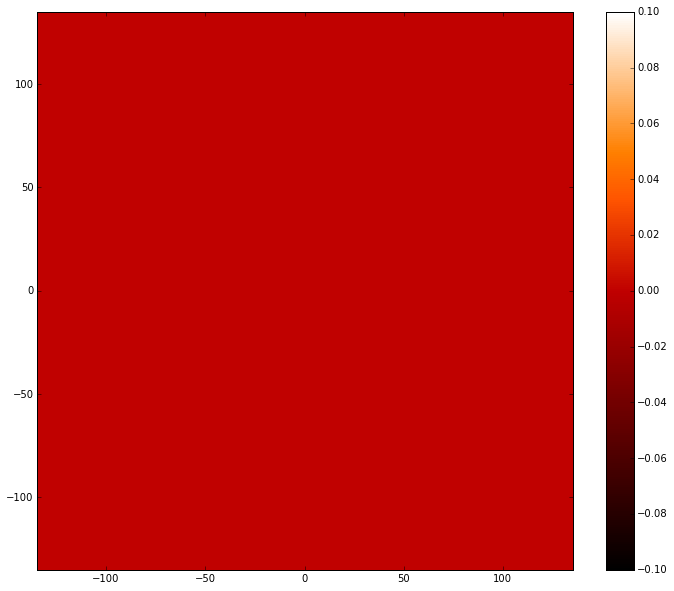

In [38]:
#Graficar 
plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
figure.colorbar(ax.pcolor(xx,yy,1000*Pot[Nl/2],cmap='gist_heat'))
plt.clabel(ax.contour(xx,yy,1000*Pot[Nl/2],levels==[-16,40,-100,-200,-400,-800,-1600],colors='k'))
#plt.pcolor(yy,zz,campo[50]*100**2,cmap='gist_heat')
#plt.colorbar()
#plt.contour(yy,zz,campo[50]*100**2)
#plt.xlim(ymin,ymax)
#plt.ylim(zmin,zmax)
plt.show()